In [127]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import linregress
import plotly.express as px
import plotly.graph_objects as go

In [128]:
#reading from output file created from Combine_dataframe.ipynb
output_data = "Output/final_dataframe.csv"
covidpolitics_df = pd.read_csv(output_data)
covid_gop =  covidpolitics_df[covidpolitics_df['Party Score'] < 1] 
covid_democrat = covidpolitics_df[covidpolitics_df['Party Score'] > 1] 
covidpolitics_df


,Unnamed: 0,States,Total positive,Total negative,Total test,Total Deaths,Population,Cases per 1 M,Deaths per 1 M,votes_dem,votes_gop,Party Score,Death Rate,state
0,0,Alabama,185322,1148993,1307694,2866,4903185.0,37796.248765,584.518022,718084.0,1306925.0,0.549445,0.015465,AL
1,1,Alaska,14413,556423,570836,68,731545.0,19702.137257,92.953954,2697087.0,3781977.0,0.713142,0.004718,AK
2,2,Arizona,238962,1481294,1714772,5875,7278717.0,32830.236428,807.147743,936250.0,1021154.0,0.916855,0.024585,AZ
3,3,Arkansas,106727,1195429,1294839,1833,3017804.0,35365.782536,607.395311,378729.0,677904.0,0.558676,0.017175,AR
4,4,California,900957,17081357,17982314,17357,39512223.0,22801.982060,439.281789,7362490.0,3916209.0,1.880004,0.019265,CA
5,5,Colorado,95087,1061126,1842254,2076,5758736.0,16511.783141,360.495775,1212209.0,1137455.0,1.065720,0.021833,CO
6,6,Connecticut,68099,2139838,2207937,4589,3565287.0,19100.566097,1287.133406,884432.0,668266.0,1.323473,0.067387,CT
7,7,Delaware,24168,317893,342061,685,973764.0,24819.155360,703.455868,235581.0,185103.0,1.272702,0.028343,DE
8,8,Florida,782011,5202712,5984723,16652,21477737.0,36410.307101,775.314457,4485745.0,4605515.0,0.973994,0.021294,FL
9,9,Georgia,351879,3109507,3461386,7827,10617423.0,33141.657820,737.184532,1837300.0,2068623.0,0.888175,0.022243,GA


In [ ]:
#-----------------------State COVID19 Death Rate Bar Chart-----------------------------------

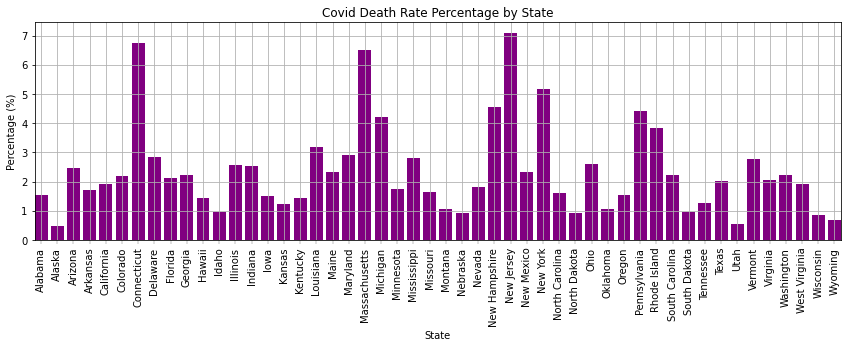

In [109]:
#Creates barchart for US states based on death rate
states_list = covidpolitics_df['States'].tolist()
x_axis = np.arange(len(covidpolitics_df))
final_percentage = covidpolitics_df['Death Rate']*100

tick_mark = [tick for tick in x_axis]

plt.xticks(tick_mark, covidpolitics_df['States'], rotation = 'vertical')
plt.bar(x_axis, final_percentage, color="purple")

plt.tick_params(axis='x', which='major', labelsize=10, width=0.25)

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*55+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])

plt.title("Covid Death Rate Percentage by State")
plt.ylabel("Percentage (%)")
plt.xlabel("State")
plt.grid()

plt.savefig("percentages_vs_states", dpi=300)

In [ ]:
#-----------------------Heat Maps: COVID19 Deaths, COVID19 Cases, and Political Preference-----------------------

In [129]:
# Create choropleth for deaths by state

fig = go.Figure(data=go.Choropleth(
    locations=covidpolitics_df['state'], # Spatial coordinates
    z = covidpolitics_df['Total Deaths'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Deaths",
))
fig.update_layout(
    title_text = 'State Deaths',
    geo_scope='usa', # limit map scope to USA
)
fig.show()


In [130]:
# Create choropleth for positive cases by state

fig = go.Figure(data=go.Choropleth(
    locations=covidpolitics_df['state'], # Spatial coordinates
    z = covidpolitics_df['Total positive'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'viridis',
    colorbar_title = "Positive Cases",
))
fig.update_layout(
    title_text = 'State Positive Cases',
    geo_scope='usa', # limit map scope to USA
)
fig.show()


In [131]:
# Create choropleth map displaying political preference by state

fig = go.Figure(data=go.Choropleth(
    locations=covidpolitics_df['state'], # Spatial coordinates
    z = covidpolitics_df['Party Score'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = ["red","blue"],
    colorbar_title = "Political Preference",
))
fig.update_layout(
    title_text = '2016 Us Party Preference Exports by state',
    geo_scope='usa', # limit map scope to USA
)
fig.show()

In [113]:
#-----------------------State COVID19 Case Rate per 1 M Residents Scatterplot w/ Linreg-----------------------------------

Text(0.5, 1.0, 'Party Preference and Covid Cases')

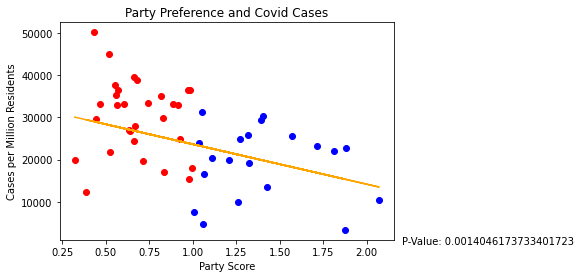

In [114]:

#calculates linear regression, plots scatter plot, and displays p value for a comparison
#of state part score (<1 GOP preference, >1 Democrat preference) vs the covid case rate in each
#state per 1 M population
st.linregress(covidpolitics_df["Party Score"], covidpolitics_df["Cases per 1 M"])
# linregresult(slope=(-9466.724941731432), intercept=33108.252994614144)
slope = -9466.724941731432
intercept = 33108.252994614144
# rvalue = -0.43954453811755007
pvalue = 0.0014046173733401723
pvaluemarker = "P-Value: {}".format(pvalue)
#stderr= 2792.2825243710254
linreg = (covidpolitics_df["Party Score"]*slope+intercept)
partyline = 1
plt.scatter(covid_democrat["Party Score"], covid_democrat["Cases per 1 M"], c='blue')
plt.scatter(covid_gop["Party Score"], covid_gop["Cases per 1 M"], c='red')
plt.plot(covidpolitics_df["Party Score"],linreg,color="orange")
plt.text(2.2,0,pvaluemarker)
plt.ylabel("Cases per Million Residents")
plt.xlabel("Party Score")
plt.title("Party Preference and Covid Cases")

LinregressResult(slope=228.58522241994038, intercept=343.932302680896, rvalue=0.2608814869196084, pvalue=0.06726733900330649, stderr=122.08953655779818)

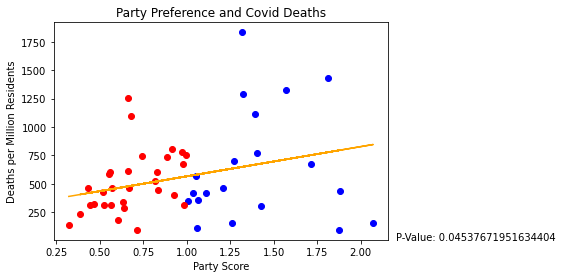

In [115]:
#-----------------------State COVID19 Death Rate per 1 M Residents Scatterplot w/ Linreg-----------------------------------
##calculates linear regression, plots scatter plot, and displays p value for a comparison
#of state part score (<1 GOP preference, >1 Democrat preference) vs the covid death rate in each
#state per 1 M population
st.linregress(covidpolitics_df["Party Score"], covidpolitics_df["Deaths per 1 M"])
# linregresult(
slope=261.3071569991663
intercept = 304.0439556193455
# rvalue = 0.28432544329095066
pvalue = 0.04537671951634404
pvaluemarker = "P-Value: {}".format(pvalue)
# stderr= 127.17750283599544
linreg = (covidpolitics_df["Party Score"]*slope+intercept)
plt.scatter(covid_democrat["Party Score"], covid_democrat["Deaths per 1 M"], c='blue')
plt.scatter(covid_gop["Party Score"], covid_gop["Deaths per 1 M"], c='red')
plt.plot(covidpolitics_df["Party Score"],linreg,color="orange")
plt.ylabel("Deaths per Million Residents")
plt.xlabel("Party Score")
plt.text(2.2,0,pvaluemarker)
plt.title("Party Preference and Covid Deaths")
st.linregress(covidpolitics_df["Party Score"], covidpolitics_df["Deaths per 1 M"])


In [116]:
#-----------------------T Testing: Death Rate in GOP v. Democrat States-----------------------------------

In [117]:
#calculates mean death rate for GOP States
p1_mean = covid_gop["Death Rate"].mean()
p2_mean = covid_democrat["Death Rate"].mean()


In [118]:
#total states w/ a Republican political preference
covid_gop.count()

States            30
Total positive    30
Total negative    30
Total test        30
Total Deaths      30
Population        30
Cases per 1 M     30
Deaths per 1 M    30
votes_dem         30
votes_gop         30
Party Score       30
Death Rate        30
dtype: int64

In [119]:
#total states w/ a Democrat political preference
covid_democrat.count()

States            20
Total positive    20
Total negative    20
Total test        20
Total Deaths      20
Population        20
Cases per 1 M     20
Deaths per 1 M    20
votes_dem         20
votes_gop         20
Party Score       20
Death Rate        20
dtype: int64

In [120]:
#ttest with 2 independent variables for state republic political preference v. democrat pref. 
#compares COVID19 death rate (deaths/total cases) between the two groups
stats.ttest_ind(covid_gop["Death Rate"], covid_democrat["Death Rate"], 
                equal_var=False)

Ttest_indResult(statistic=-3.295384468367781, pvalue=0.002784575890538561)

In [121]:
Avg = covidpolitics_df['Party Score'].mean()
Avg

0.9663674824685358

In [122]:
Std = covidpolitics_df['Party Score'].std()
Std

0.4323849241167712

In [123]:
low_range = Avg-0.5*Std
low_range

0.7501750204101502

In [99]:
high_range = Avg+0.5*Std
high_range

1.1825599445269215

In [100]:
Republican_preference_df_reduced = covidpolitics_df[covidpolitics_df['Party Score']<low_range]
Democrat_Preference_df_reduced = covidpolitics_df[covidpolitics_df['Party Score']>high_range]

p1_mean_reduced = Republican_preference_df_reduced["Death Rate"].mean()
p2_mean_reduced = Democrat_Preference_df_reduced["Death Rate"].mean()

In [101]:
Republican_preference_df_reduced.count()

States            20
Total positive    20
Total negative    20
Total test        20
Total Deaths      20
Population        20
Cases per 1 M     20
Deaths per 1 M    20
votes_dem         20
votes_gop         20
Party Score       20
Death Rate        20
dtype: int64

In [102]:
Democrat_Preference_df_reduced.count()

States            14
Total positive    14
Total negative    14
Total test        14
Total Deaths      14
Population        14
Cases per 1 M     14
Deaths per 1 M    14
votes_dem         14
votes_gop         14
Party Score       14
Death Rate        14
dtype: int64

In [103]:
p1_mean_reduced

0.01454298277502113

In [104]:
p2_mean_reduced

0.03561365321861592

In [105]:
stats.ttest_ind(Republican_preference_df_reduced["Death Rate"], Democrat_Preference_df_reduced["Death Rate"], 
                equal_var=False)

Ttest_indResult(statistic=-3.787285887832505, pvalue=0.001673935775959741)